# Lesson 13 and 14 Assessment (Case Study 2: Designing a Customer Satisfaction Report)

## Import All the necessary Liabraries

In [942]:
import pandas as pd

In [943]:
import matplotlib.pyplot as plt

In [944]:
import seaborn as sns

In [945]:
import numpy as np

In [946]:
import datetime

## Generate Random data

In [947]:
dates = pd.date_range(start='2023-01-01', end='2023-12-31')

In [948]:
customer_data = {
  'Date': np.random.choice(dates,500),
  'Service_type': np.random.choice(['Service A','Service B','Service C'],500),
  'Rating': np.random.randint(1,6,500),
  'Feedback': np.random.choice(['Excellent', 'Good', 'Average', 'Poor', 'Terrible'], 500)
}

In [949]:
customer_satisfaction_df = pd.DataFrame(customer_data)
customer_satisfaction_df.head()

,Date,Service_type,Rating,Feedback
0,2023-05-05,Service C,4,Poor
1,2023-04-12,Service A,4,Excellent
2,2023-04-06,Service B,2,Good
3,2023-11-17,Service B,1,Poor
4,2023-05-21,Service B,4,Good


## Using the generated dataset, calculate the average satisfaction rating.

In [950]:
avg_sat_rating = customer_data['Rating'].mean()
print(f"This is the average satifaction rating: {avg_sat_rating:.2f}")

This is the average satifaction rating: 3.00


## Create a histogram showing the distribution of satisfaction ratings.

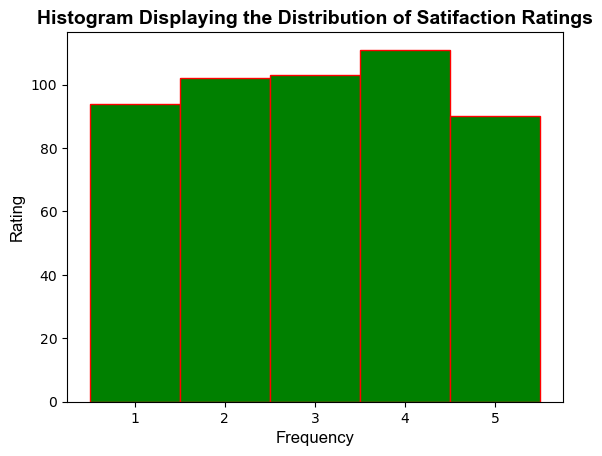

In [951]:
plt.hist(customer_satisfaction_df['Rating'], bins=range(1,7), color='g', edgecolor='r',align='left')
plt.title('Histogram Displaying the Distribution of Satifaction Ratings', fontfamily='arial', fontweight='bold', fontsize=14)
plt.ylabel('Rating', fontfamily='arial', fontsize=12)
plt.xlabel('Frequency', fontfamily='arial', fontsize=12)
plt.xticks(range(1,6))
plt.show()

## Identify the service type with the highest average rating.

In [952]:
service_with_highest_average = customer_satisfaction_df.groupby('Service_type')['Rating'].mean().idxmax()
service_with_highest_average_value = customer_satisfaction_df.groupby('Service_type')['Rating'].mean().max()
print(f"{service_with_highest_average} has the highest average rating of {service_with_highest_average_value:.2f}")

Service A has the highest average rating of 3.03


## Determine the most common feedback received.

In [953]:
most_common_feedback = customer_satisfaction_df['Feedback'].value_counts().idxmax()
frequency_of_most_common_feedback = customer_satisfaction_df['Feedback'].value_counts().max()
print(f"The most common feedback response is {most_common_feedback} and it occured {frequency_of_most_common_feedback} times")

The most common feedback response is Poor and it occured 117 times


## Create a pie chart showing the proportion of each feedback type.

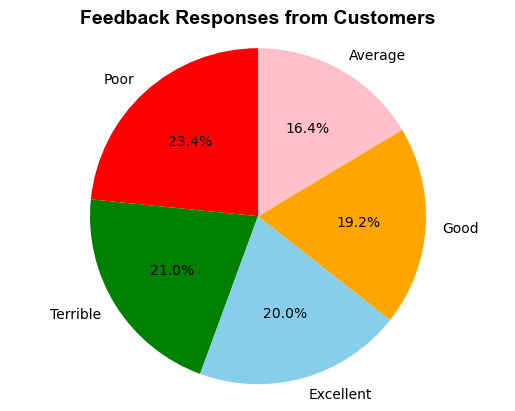

In [954]:
feedback_responses = customer_satisfaction_df['Feedback'].value_counts()
feedback_responses.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['r', 'g', 'skyblue', 'orange', 'pink'])
plt.title('Feedback Responses from Customers',fontfamily='arial', fontsize=14, fontweight='bold')
plt.ylabel('',fontfamily='arial', fontsize=12, fontweight='bold')
plt.axis('equal')
plt.show()


## Calculate the percentage of ratings that are 4 or higher.

In [955]:
percenOf_ratings_overfour = round((customer_satisfaction_df[customer_satisfaction_df['Rating'] >= 4]['Rating'].count() / 500) * 100, 2)
print(f"{percenOf_ratings_overfour}% of Ratings are 4 and greater")

40.2% of Ratings are 4 and greater


## Identify the month with the highest average satisfaction rating.

In [956]:
customer_satisfaction_df['Month'] = customer_satisfaction_df['Date'].dt.to_period('M')
monthWithHighest_average_rating = customer_satisfaction_df.groupby('Month')['Rating'].mean().idxmax()
monthWithHighest_average_rating = monthWithHighest_average_rating.strftime('%B')
monthWithHighest_average_rating_value = customer_satisfaction_df.groupby('Month')['Rating'].mean().max()
print(f"{monthWithHighest_average_rating} has the highest average rating of {monthWithHighest_average_rating_value:.2f}")

April has the highest average rating of 3.23


c:\Users\Itumeleng.Sekoma\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Itumeleng.Sekoma\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


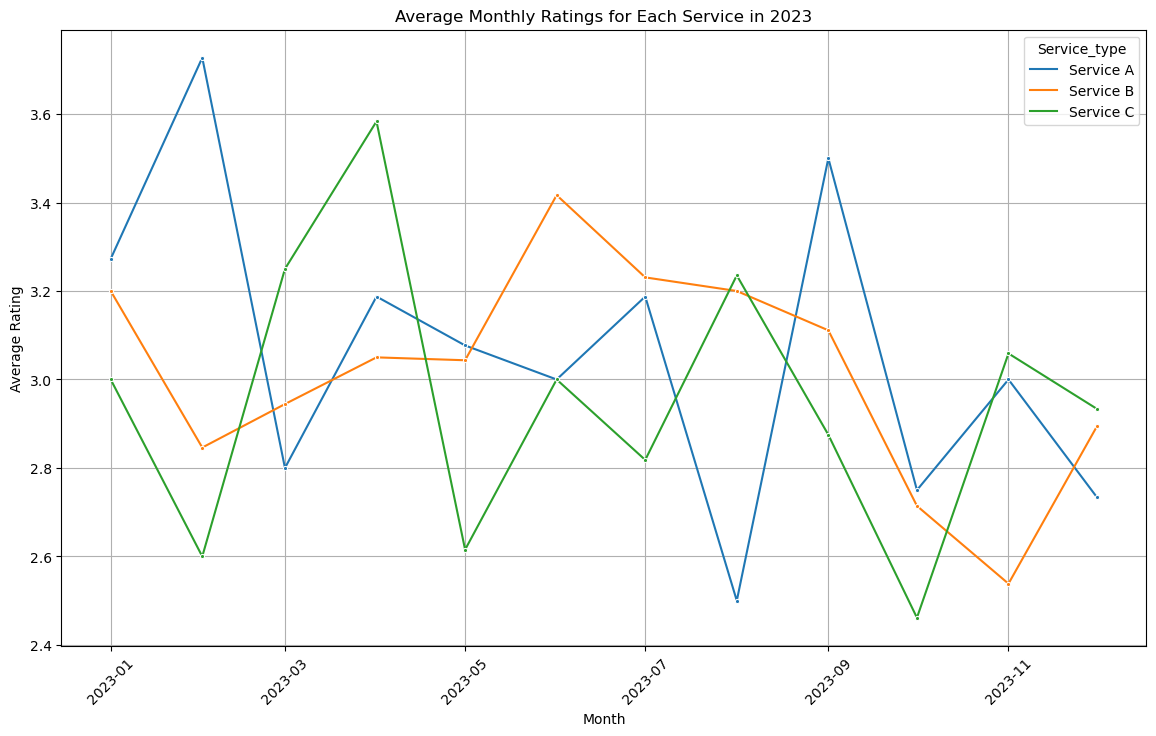

In [957]:
monthly_ratings = customer_satisfaction_df.groupby(['Month', 'Service_type'])['Rating'].mean().reset_index()
monthly_ratings['Month'] = monthly_ratings['Month'].dt.to_timestamp()

plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_ratings, x='Month', y='Rating', hue='Service_type', marker='.')
plt.title('Average Monthly Ratings for Each Service in 2023')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Design a simple report layout using the calculated metrics and visualizations.

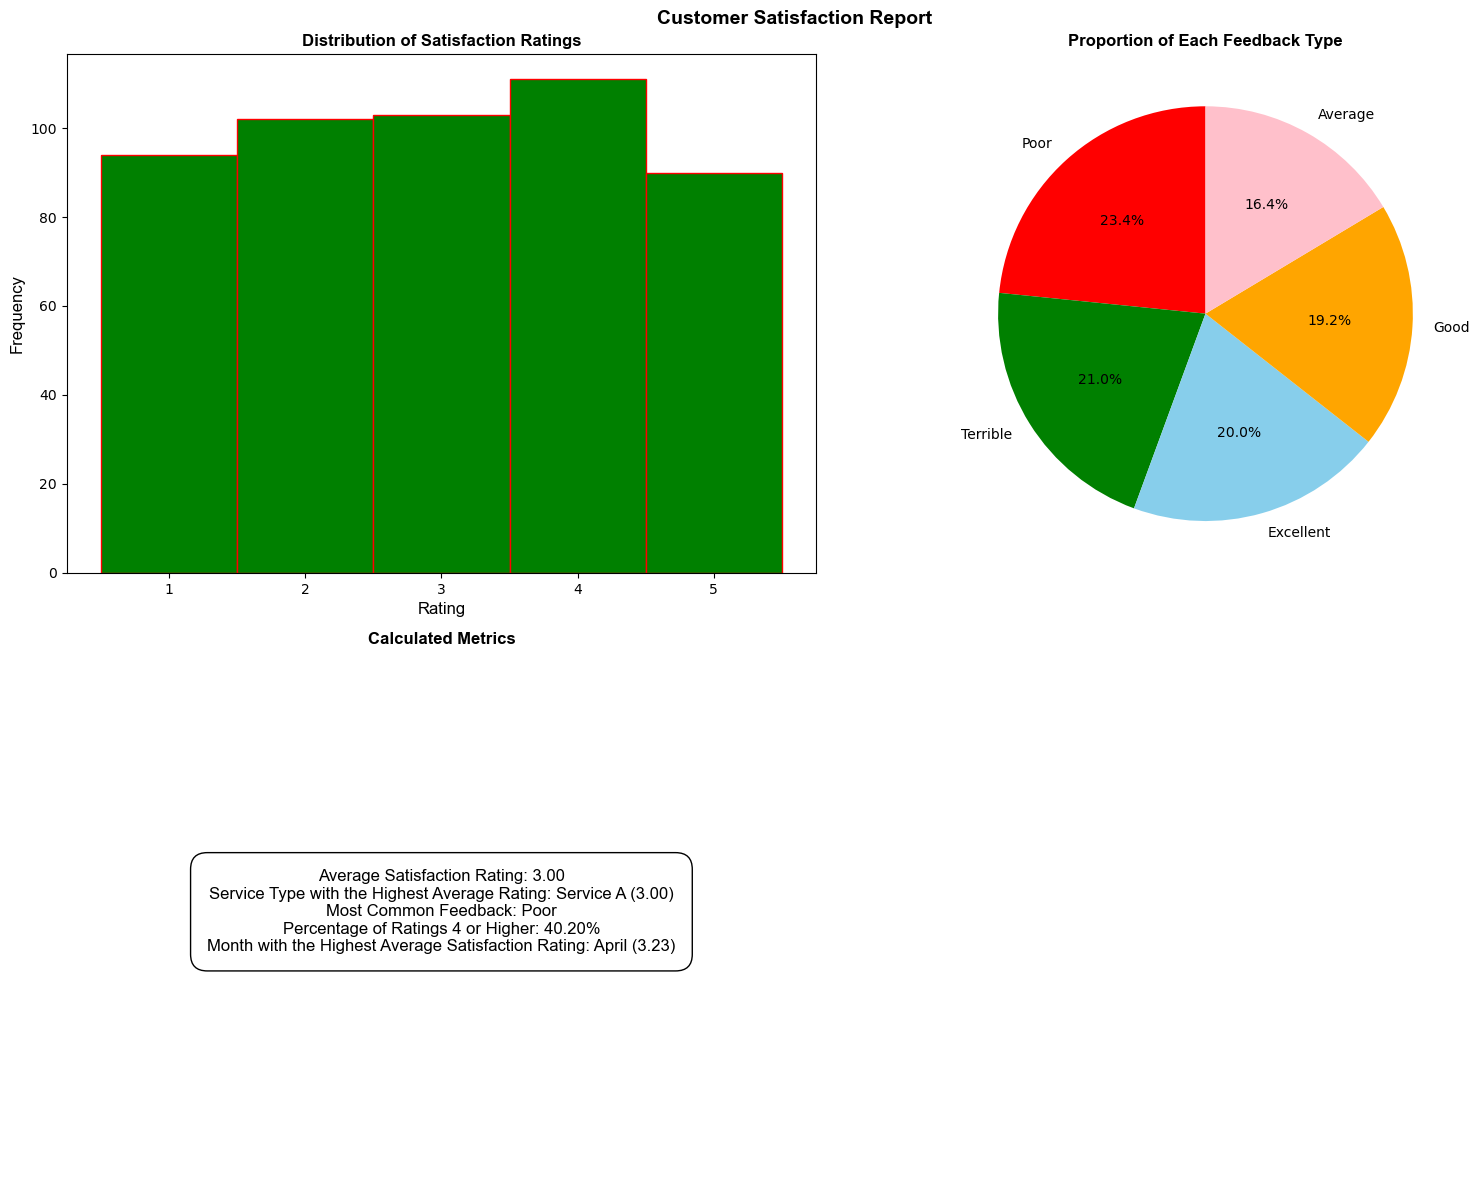

In [958]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
plt.suptitle('Customer Satisfaction Report', fontfamily='arial', fontweight='bold', fontsize='14')

# Plot distribution of satisfaction ratings
axs[0, 0].hist(customer_satisfaction_df['Rating'], bins=range(1, 7), color='g', edgecolor='r', align='left')
axs[0, 0].set_title('Distribution of Satisfaction Ratings', fontfamily='arial', fontweight='bold', fontsize='12')
axs[0, 0].set_xlabel('Rating', fontfamily='arial', fontsize='12')
axs[0, 0].set_ylabel('Frequency', fontfamily='arial', fontsize='12')
axs[0, 0].set_xticks(range(1, 6))

# Plot proportion of each feedback type
feedback_responses.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['r', 'g', 'skyblue', 'orange', 'pink'], ax=axs[0, 1])
axs[0, 1].set_title('Proportion of Each Feedback Type', fontfamily='arial', fontweight='bold', fontsize='12')
axs[0, 1].set_ylabel('')

# Metrics
dashboard_text = (
    f"Average Satisfaction Rating: {avg_sat_rating:.2f}\n"
    f"Service Type with the Highest Average Rating: {service_with_highest_average} ({avg_sat_rating:.2f})\n"
    f"Most Common Feedback: {most_common_feedback}\n"
    f"Percentage of Ratings 4 or Higher: {percenOf_ratings_overfour:.2f}%\n"
    f"Month with the Highest Average Satisfaction Rating: {monthWithHighest_average_rating} ({monthWithHighest_average_rating_value:.2f})"
)

# Display metrics
axs[1, 0].set_title('Calculated Metrics', fontfamily='arial', fontweight='bold', fontsize='12')
axs[1, 0].text(0.5, 0.5, dashboard_text, fontfamily='arial', fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axs[1, 0].axis('off')

# Remove the unused subplot
fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()
